# Classical Electrodynamics - Problem Set 1
## Dimitris Kourtesis - Subatomic Physics Masters

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from rcparams import rcparams
mpl.rcParams.update(rcparams)

# physical constants in SI
e0 = 8.854 * 10**(-12)
a = 1e-2
Q = 1e-9

## Exercise 1.4:

Resulting plots for the electric field produced from different charged spheres.

In [2]:
def E1(r):
    if r < a:
        return 0
    else:
        return (1/(4*np.pi*e0)*(Q/(r**2)))

E1_vec = np.vectorize(E1)

def E2(r):
    if r <=a:
        return (Q/(4*np.pi*e0*(a**3)))*r
    else:
        return (Q / (4*np.pi*e0*(r**2)))

E2_vec = np.vectorize(E2)

def E3(r, n):
    if r <= a:
        return (Q/(4*np.pi*e0*(r**2)))*((r/a)**(n+3))
    else:
        return (Q / (4*np.pi*e0*(r**2)))

E3_vec = np.vectorize(E3)

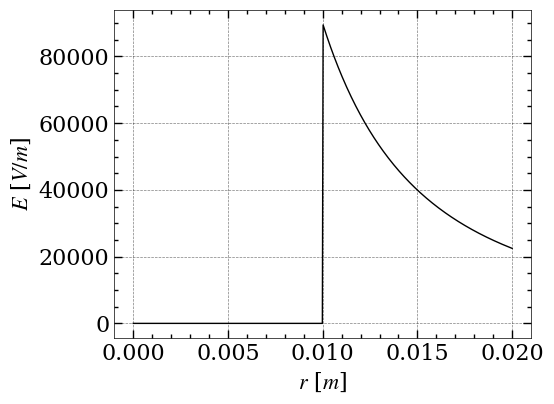

In [3]:
# Create r values (avoid 0 to prevent division by zero)
r_vals = np.linspace(1e-5, 2*a, 500)
E_vals = E1_vec(r_vals)

# Plot
plt.figure(figsize=(6,4.5), tight_layout=True)
plt.plot(r_vals, E_vals, color='black')

# Labels with LaTeX formatting
plt.xlabel(r"$r$ [$m$]")
plt.ylabel(r"$E$ [$V/m$]")

plt.savefig("01.png", dpi=200)
plt.show()

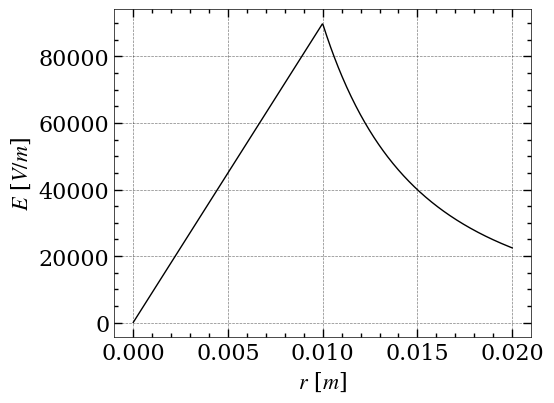

In [4]:
# Create r values (avoid 0 to prevent division by zero)
r_vals = np.linspace(1e-5, 2*a, 500)
E_vals = E2_vec(r_vals)

# Plot
plt.figure(figsize=(6,4.5), tight_layout=True)
plt.plot(r_vals, E_vals, color='black')

# Labels with LaTeX formatting
plt.xlabel(r"$r$ [$m$]")
plt.ylabel(r"$E$ [$V/m$]")

plt.savefig("02.png", dpi=200)
plt.show()

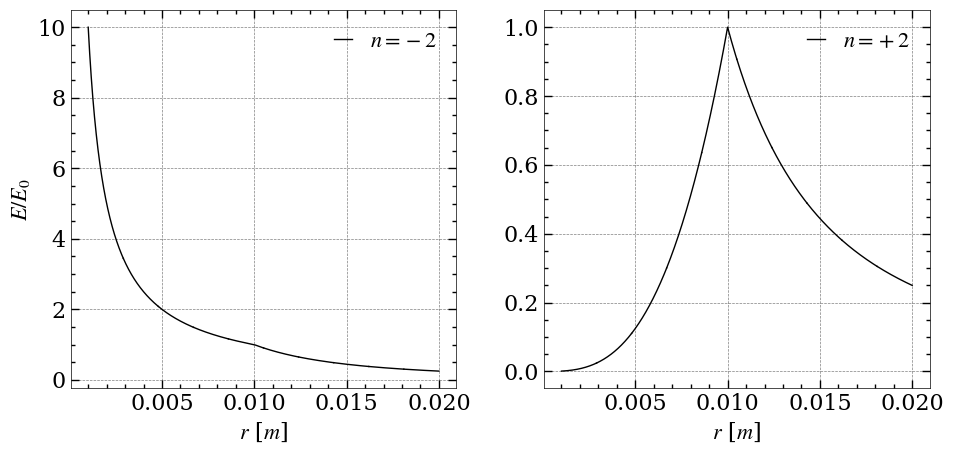

In [5]:
r_vals = np.linspace(1e-3, 2*a, 100000)

# Compute for n = -2 and +2
E_n_minus2 = E3_vec(r_vals, -2)
E_n_plus2 = E3_vec(r_vals, 2)

E_0 = Q / (4*np.pi*e0*(a**2))

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5), tight_layout=True)

# Left plot (n = -2)
axes[0].plot(r_vals, E_n_minus2 / E_0, color='black', label=r"$n = -2$")
#axes[0].set_yscale("log")
axes[0].set_xlabel(r"$r$ [$m$]")
axes[0].set_ylabel(r"$E/E_{0}$")
axes[0].legend(frameon=False, loc="upper right", handlelength=0.8)

# Right plot (n = +2)
axes[1].plot(r_vals, E_n_plus2 / E_0, color='black', label=r"$n = +2$")
axes[1].set_xlabel(r"$r$ [$m$]")
axes[1].legend(frameon=False, loc="upper right", handlelength=0.8)

plt.savefig("03.png", dpi=200)
plt.show()

## Exercise 1.5:

Qualitative plot for the two terms of the neutral hydrogen atom charge density.

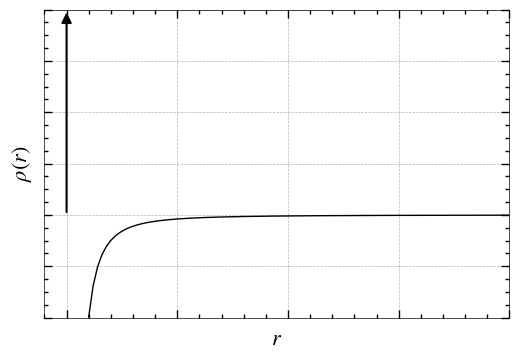

In [6]:
# Constants (qualitative plot, no need for specific choice)
q = 1
a = 1

# r value
r = np.linspace(1e-3, 0.1, 500)

# rho(r) function
def rho(r):
    return - (a**3)/(8*np.pi*r**2) * q * np.exp(-a*r)

rho_values = rho(r)

# Create figure and axes
fig, ax = plt.subplots(figsize=(6,4))

# Plot the curve
ax.plot(r, rho_values, color='black', label=r"$\rho(r)$")

arrow = FancyArrowPatch(
    posA=(0, 0), posB=(0, 80000),   # start and end points
    arrowstyle='-|>',            # line with arrow tip
    mutation_scale=15,           # size of arrow tip
    color='black',
    linewidth=1.5
)
ax.add_patch(arrow)

# Extend x-limits so 0 is visible
ax.set_autoscaley_on(False)
ax.set_xlim(-0.001, 0.02)
ax.set_ylim(-40000,80000)

# Labels (optional)
ax.set_xlabel(r"$r$")
ax.set_ylabel(r"$\rho(r)$")

# Grid and remove tick labels
ax.grid(True, alpha=0.3)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig("04.png", dpi=250)
plt.show()
